# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [14]:
!pip install citipy

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = "ad1f2e927c3ffb199a573d138bfbd6e1"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
names = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        names.append(response['name'])
        print(f"Processing data for #{(response['id'])} {city}")
    except:
        print("Oops, couldn't find that city.")

Processing data for #3378644 georgetown
Oops, couldn't find that city.
Processing data for #5563397 eureka
Oops, couldn't find that city.
Processing data for #2729907 longyearbyen
Processing data for #1106677 bambous virieux
Processing data for #2163355 hobart
Oops, couldn't find that city.
Processing data for #6201424 mataura
Processing data for #3369157 cape town
Processing data for #2374583 bubaque
Processing data for #6167817 torbay
Processing data for #5504003 fernley
Processing data for #2013279 vostok
Processing data for #2208248 kaitangata
Processing data for #3471451 arraial do cabo
Processing data for #2065594 mount isa
Processing data for #2094342 kavieng
Processing data for #2181625 te anau
Processing data for #2075265 busselton
Processing data for #484287 tarusa
Processing data for #2517679 fortuna
Processing data for #4030556 rikitea
Processing data for #3698304 chimbote
Processing data for #477940 ust-tsilma
Processing data for #608872 makat
Oops, couldn't find that city

Processing data for #2126710 beringovskiy
Processing data for #1260206 pasighat
Oops, couldn't find that city.
Processing data for #315498 eregli
Processing data for #3419842 sisimiut
Processing data for #3466165 cidreira
Processing data for #2126123 chokurdakh
Processing data for #5427957 lamar
Oops, couldn't find that city.
Processing data for #3111101 salas
Processing data for #87205 darnah
Processing data for #2028164 deputatskiy
Processing data for #2016307 solnechnyy
Processing data for #2620147 holbaek
Processing data for #3599699 antigua guatemala
Processing data for #3157799 farsund
Processing data for #509052 plavsk
Processing data for #986717 kruisfontein
Processing data for #3147822 gravdal
Processing data for #2088122 port moresby
Processing data for #5882953 aklavik
Processing data for #3466980 caravelas
Processing data for #470905 vuktyl
Processing data for #2288105 grand-lahou
Processing data for #2017155 saskylakh
Processing data for #3671450 inirida
Processing data fo

Processing data for #124862 marand
Processing data for #3467877 campina grande do sul
Processing data for #5946820 edson
Processing data for #3899539 antofagasta
Processing data for #1493722 rebrikha
Processing data for #3932145 pisco
Processing data for #2167426 emerald
Processing data for #4787534 sterling
Processing data for #1969674 polewali
Processing data for #3592086 ocos
Processing data for #2209055 waddan
Oops, couldn't find that city.
Processing data for #2318374 gboko
Processing data for #3395458 maragogi
Processing data for #3573739 esperance
Processing data for #3828545 san jose del guaviare
Processing data for #3664525 codajas
Processing data for #1485020 znamenskoye
Processing data for #2448085 agadez
Processing data for #1528998 yumen
Processing data for #705681 klembivka
Processing data for #2121385 severo-kurilsk
Processing data for #1811764 heyang
Processing data for #6063191 mackenzie
Oops, couldn't find that city.
Processing data for #2995603 saint-pierre
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    "name": names,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,name,lat,temp,humidity,cloudiness,wind_speed
0,Georgetown,6.80,80.60,78,40,11.41
1,Eureka,40.80,63.43,59,75,14.99
2,Longyearbyen,78.22,24.80,85,90,9.17
3,Bambous Virieux,-20.34,77.00,88,75,8.05
4,Hobart,-42.88,59.00,62,75,5.82


In [11]:
# Convert to csv 
weather_data.to_csv("../WeatherData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

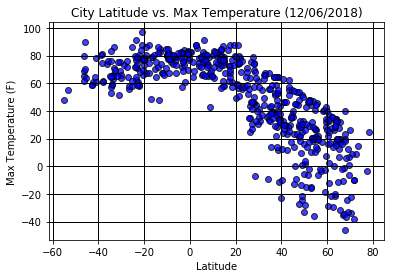

In [12]:
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (12/06/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsTemp.png")

#### Latitude vs. Humidity Plot

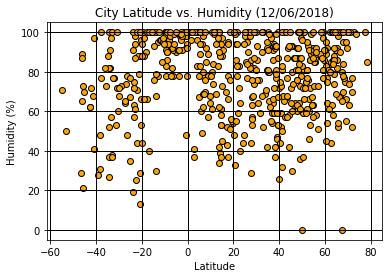

In [14]:
plt.scatter(lat, humidity, marker="o", facecolors="orange", edgecolors="black")
plt.title("City Latitude vs. Humidity (12/06/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig("../LatVsHumidity.png")

#### Latitude vs. Cloudiness Plot

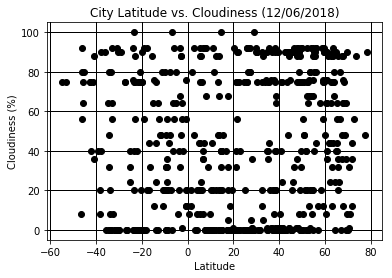

In [15]:
plt.scatter(lat, cloudiness, marker="o", facecolors="black", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (12/06/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(color="black", linestyle="-", linewidth=1)
plt.savefig('../LatVsCloudiness.png')

#### Latitude vs. Wind Speed Plot

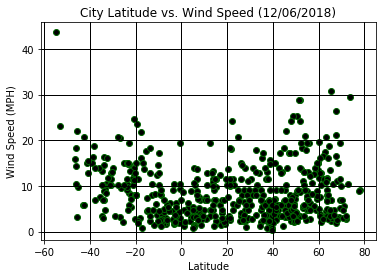

In [16]:
plt.scatter(lat, wind_speed, marker="o", facecolors="black", edgecolors="darkgreen")
plt.title("City Latitude vs. Wind Speed (12/06/2018)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(color="black", linestyle="-", linewidth=1)
plt.savefig('../LatVsWindSpeed.png')